Березовський Денис Васильович ІПЗ-22010бск Варіант 2

1. Створити програму для генерації довільного масиву із 42 цілих чисел, які не перевищують по
модулю 99, з наступними властивостями:
1.1. При кожному запуску програми масив повинен бути різним.
1.2. Додатних елементів в масиві повинно бути не більше 30 відсотків.
1.3. Масив повинен містити від 3 до 6 максимальних по модулю та різних по знакам елементів
(розташованих в довільних місцях)

In [17]:
import random

def generate_array():
    array = [random.randint(-99, 99) for _ in range(42)]
    max_positive_elements = int(0.3 * 42)
    positive_count = sum(1 for x in array if x > 0)

    while positive_count > max_positive_elements:
        index = random.choice([i for i, x in enumerate(array) if x > 0])
        array[index] = -random.randint(1, 99)
        positive_count = sum(1 for x in array if x > 0)

    num_extreme_elements = random.randint(3, 6)
    for _ in range(num_extreme_elements):
        index = random.randint(0, 41)
        extreme_value = 99 if random.choice([True, False]) else -99
        array[index] = extreme_value

    return array

array = generate_array()
print("Згенерований масив:", array)


Згенерований масив: [-85, -41, -88, -49, -95, -10, -9, 98, -3, -58, 7, -97, -98, -64, -95, -80, -15, 26, 54, -88, 48, -99, -76, 43, 40, -50, -44, -33, 39, -14, -12, 83, 12, -86, 43, -80, 99, -36, -99, -45, -99, -29]


2. Зберегти згенерований масив в файл.

In [18]:
with open("generated_array.txt", "w") as file:
    file.write(" ".join(map(str, array)))

3. Створити програму, яка зчитує із файлу згенерований масив попередньою програмою і виводить
його на екран.

In [19]:
with open("generated_array.txt", "r") as file:
    array = list(map(int, file.read().split()))
    
print("Зчитаний масив:", array)


Зчитаний масив: [-85, -41, -88, -49, -95, -10, -9, 98, -3, -58, 7, -97, -98, -64, -95, -80, -15, 26, 54, -88, 48, -99, -76, 43, 40, -50, -44, -33, 39, -14, -12, 83, 12, -86, 43, -80, 99, -36, -99, -45, -99, -29]


4. Візуалізувати масив за допомогою стовпчастої вертикальної діаграми. Вивести відповідне
значення для кожного стовпця. Виділити кольором стовпці, які відповідають максимальним та
мінімальним по модулю елементам. Виділити іншим кольором стовпці, які відповідають
додатним елементам.

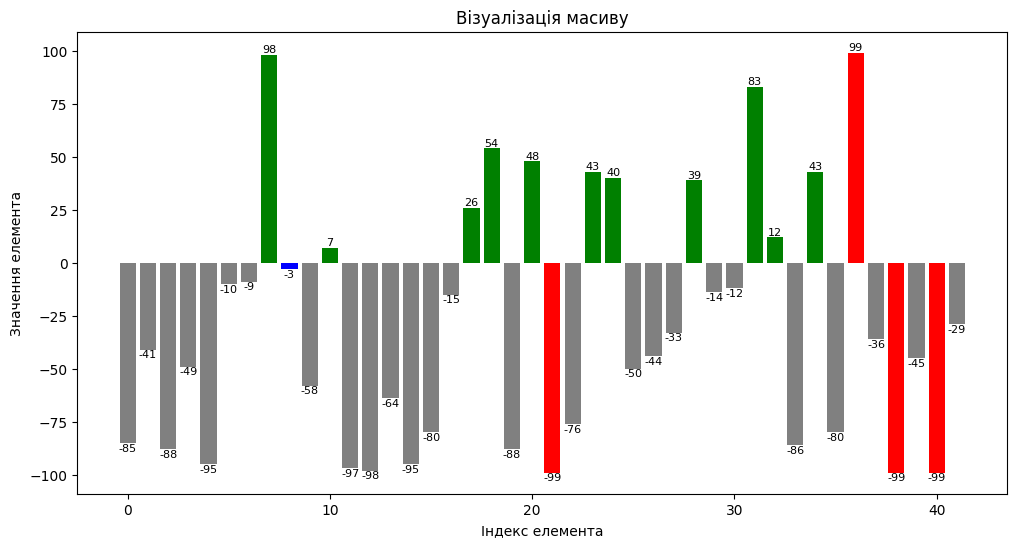

In [20]:
import matplotlib.pyplot as plt

with open("generated_array.txt", "r") as file:
    array = list(map(int, file.read().split()))

max_abs_value = max(array, key=abs)
min_abs_value = min(array, key=abs)

colors = []
for num in array:
    if abs(num) == abs(max_abs_value):
        colors.append("red")
    elif abs(num) == abs(min_abs_value):
        colors.append("blue")
    elif num > 0:
        colors.append("green")
    else:
        colors.append("gray")

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(array)), array, color=colors)

for bar, value in zip(bars, array):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom' if value >= 0 else 'top', fontsize=8)

plt.xlabel("Індекс елемента")
plt.ylabel("Значення елемента")
plt.title("Візуалізація масиву")

plt.show()


5. Порахувати суму та кількість додатних елементів масиву

In [21]:
with open("generated_array.txt", "r") as file:
    array = list(map(int, file.read().split()))

positive_elements = [num for num in array if num > 0]
sum_positive = sum(positive_elements)
count_positive = len(positive_elements)

print("Сума додатних елементів:", sum_positive)
print("Кількість додатних елементів:", count_positive)


Сума додатних елементів: 592
Кількість додатних елементів: 12


6. Порахувати кількість та добуток елементів масиву, розташованих між найближчими
мінімальним і максимальним по модулю елементами.

In [22]:
import numpy as np

with open("generated_array.txt", "r") as file:
    array = list(map(int, file.read().split()))

max_abs_index = array.index(max(array, key=abs))
min_abs_index = array.index(min(array, key=abs))

start, end = sorted((max_abs_index, min_abs_index))
elements_between = array[start + 1:end]

count_between = len(elements_between)
product_between = np.prod(elements_between) if elements_between else 0

print("Кількість елементів між найближчими мінімальним і максимальним по модулю:", count_between)
print("Добуток елементів між найближчими мінімальним і максимальним по модулю:", product_between)


Кількість елементів між найближчими мінімальним і максимальним по модулю: 12
Добуток елементів між найближчими мінімальним і максимальним по модулю: 972849107441811456


7. Впорядкувати елементи масиву по спаданню. Вивести отриманий масив та його графічну
діаграму на екран.

Впорядкований масив по спаданню: [99, 98, 83, 54, 48, 43, 43, 40, 39, 26, 12, 7, -3, -9, -10, -12, -14, -15, -29, -33, -36, -41, -44, -45, -49, -50, -58, -64, -76, -80, -80, -85, -86, -88, -88, -95, -95, -97, -98, -99, -99, -99]


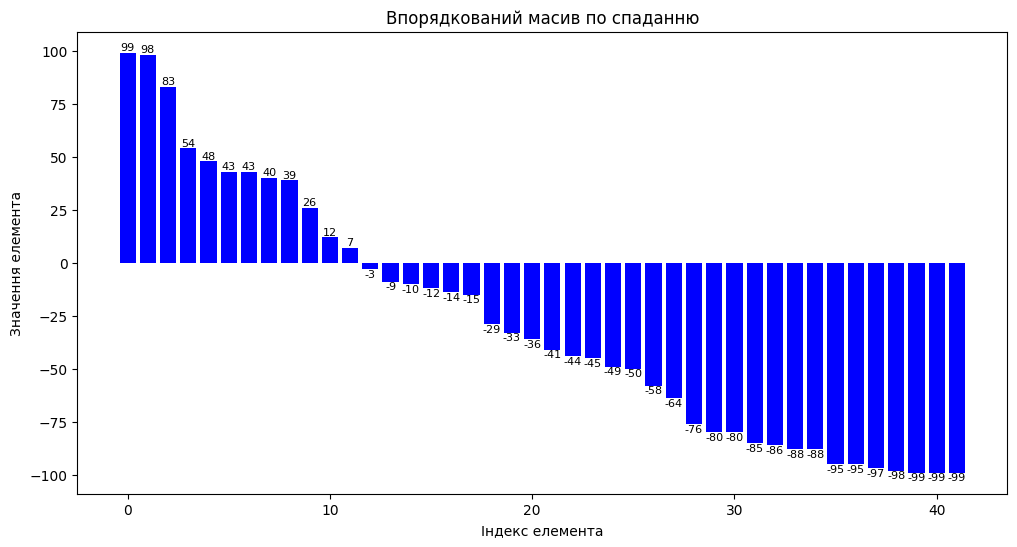

In [23]:
import matplotlib.pyplot as plt

with open("generated_array.txt", "r") as file:
    array = list(map(int, file.read().split()))

sorted_array = sorted(array, reverse=True)

print("Впорядкований масив по спаданню:", sorted_array)

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_array)), sorted_array, color='blue')

for bar, value in zip(range(len(sorted_array)), sorted_array):
    plt.text(bar, value, str(value), ha='center', va='bottom' if value >= 0 else 'top', fontsize=8)

plt.xlabel("Індекс елемента")
plt.ylabel("Значення елемента")
plt.title("Впорядкований масив по спаданню")

plt.show()
